![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import re

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
36574,id_1988,Milan,"['Italian', 'Pizza', 'Vegetarian Friendly']",1990.0,$,172.0,"[['4 formaggio', ""You should go, it's tasty""],...",/Restaurant_Review-g187849-d3726665-Reviews-Pi...,d3726665,1,4.0
9510,id_9510,Munich,"['German', 'Bar', 'European', 'Pub', 'Central ...",1390.0,$$ - $$$,61.0,"[['Late lunch.', 'Had brunch'], ['09/25/2017',...",/Restaurant_Review-g187309-d1039721-Reviews-Kr...,d1039721,0,0.0
4030,id_4030,Paris,"['Cafe', 'Healthy', 'Mediterranean', 'European...",5169.0,$,19.0,[['Toujours un plaisir / Very nice and cosy p....,/Restaurant_Review-g187147-d9583347-Reviews-Ra...,d9583347,0,0.0
25505,id_2202,Madrid,"['Chinese', 'Asian']",2204.0,$$ - $$$,53.0,"[['Nice food', 'Tasty Food'], ['10/10/2017', '...",/Restaurant_Review-g187514-d2078308-Reviews-Gr...,d2078308,1,4.0
11499,id_1757,Lisbon,NaN,1759.0,NaN,10.0,"[['KFC'], ['07/14/2017']]",/Restaurant_Review-g189158-d12207700-Reviews-K...,d12207700,1,4.0


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

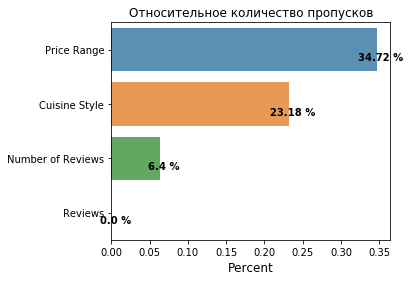

In [15]:
# Считаем процент пропусков
per_nans = pd.DataFrame(1-data.count()/data.shape[0]).reset_index().rename({0:'percent'}, \
                                                axis=1).sort_values('percent', ascending=False).query('percent>0')
# Строим график относительного количества пропущенных значений:
fig, ax = plt.subplots(figsize = (5, 4))
bar_plot = sns.barplot(x='percent', y='index', data=per_nans, alpha=0.8, ci=None)
for ytick in bar_plot.get_yticks():
        bar_plot.text(per_nans.iloc[ytick][1]+0.005, ytick+0.2, str(round(per_nans.iloc[ytick][1]*100,2))+' %', 
                    horizontalalignment='center',size=10, color='black',weight='semibold')
plt.title('Относительное количество пропусков')
plt.ylabel('')
plt.xlabel('Percent', fontsize=12)
plt.show()

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## Очистка и обработка признаков

# Restaurant_id

In [16]:
data['Restaurant_id'].value_counts()

id_227      19
id_633      19
id_871      19
id_436      19
id_585      18
            ..
id_14391     1
id_10818     1
id_8907      1
id_12113     1
id_12180     1
Name: Restaurant_id, Length: 13094, dtype: int64

Некоторые id встречаются более 1 раза, что может быть всязано с тем, что они являются сетевыми. Создадим новый признак chain: 1 - ресторан сетевой, 0 - нет.

In [17]:
chain_lst = list(data.Restaurant_id.value_counts()[data.Restaurant_id.value_counts() > 1].index)
data['chain'] = data[data.Restaurant_id.isin(chain_lst)].Restaurant_id.apply(lambda x: 1)
data['chain'].fillna(0, inplace=True)
data['chain'] = data['chain'].astype(int)

# City

Посмотрим на распределение рейтингов по городам

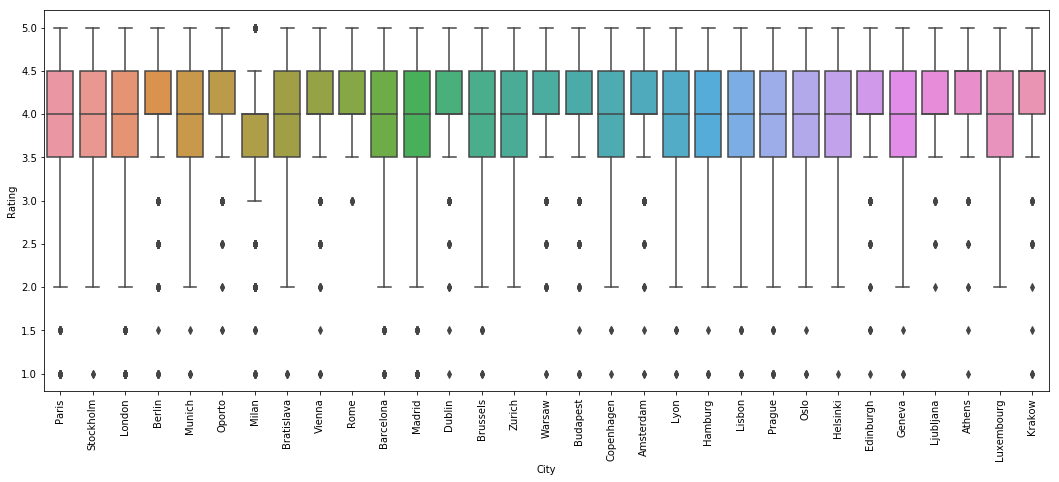

In [18]:
plt.figure(figsize=(18, 7))
sns.boxplot(x='City', y='Rating', data=data[data['sample'] == 1])
plt.xticks(rotation=90);

### Number of reviews

In [19]:
# Обработаем пропуски столбца Number of Reviews - создадим дополнительный столбец
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [20]:
# Заполним пропуски нулями, предполагая, что NaN может обозначать отсутствие отзывов
data['Number of Reviews'].fillna(0, inplace=True)

### Price Range

In [21]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  

In [22]:
# Создадим дополнительный столбец Price_Range_isNAN
data['Price_Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')
# Заменим Price Range числами, при этом попробуем заменить NAN на 2 - самую часто встречающуюся ценовую категорию
replace_price_range = {'Price Range': {"$": 1, "$$ - $$$": 2, "$$$$": 3, np.NaN: 2}}
data.replace(replace_price_range, inplace=True)

### Cuisine Style

In [23]:
# Также создадим столбец, содержащий информацию о пропусках
data['Cuisine_Style_isNAN'] = pd.isna(data['Cuisine Style']).astype('uint8')

In [24]:
# Заменим пропуски на Unknown
data['Cuisine Style'] = data['Cuisine Style'].fillna("['Unknown']")

In [25]:
def cuisine (df):
    # Приводим все названия кухонь к одному формату.
    df['Cuisine Style'] = df['Cuisine Style'].str.lower()

    # Делаем преобразования.
    cuisineStyle = set()
    cuisines = df['Cuisine Style'].to_list()

    # Заполняем сет для получения уникальных значений.
    # А так же создаем список
    for cuisine in cuisines:
        cuisine = re.findall(r"'([\s\S]+?)'", cuisine)
        for j in cuisine:
            cuisineStyle.add(j)
    
    for item in cuisineStyle:
        df[item] = df['Cuisine Style'].apply(lambda x: 1 if item in x else 0)
    return df

In [26]:
data = cuisine(data)

Можно сделать фиктивные переменные

### Ranking

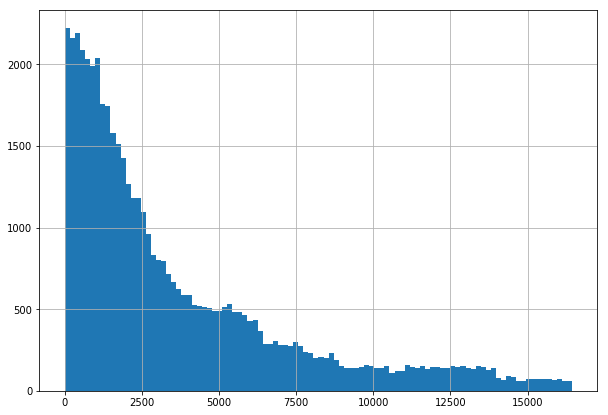

In [27]:
# Посмотрим распределение признака
plt.rcParams['figure.figsize'] = (10,7)
data['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

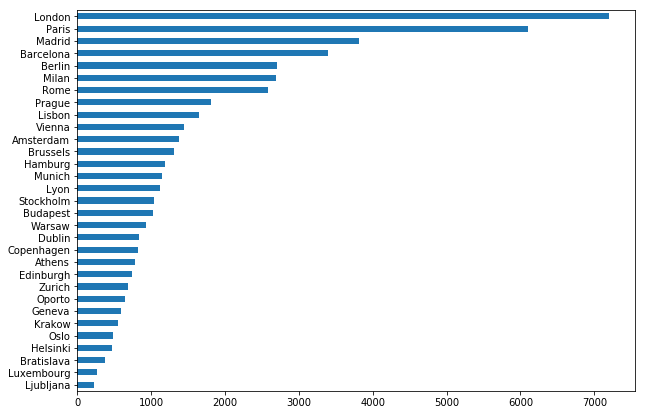

In [28]:
data['City'].value_counts(ascending=True).plot(kind='barh')

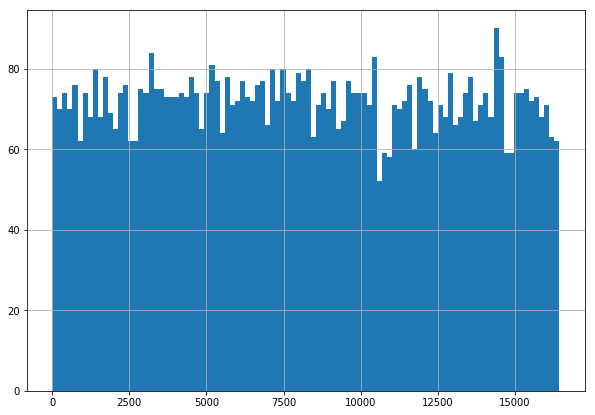

In [29]:
data['Ranking'][data['City'] =='London'].hist(bins=100)

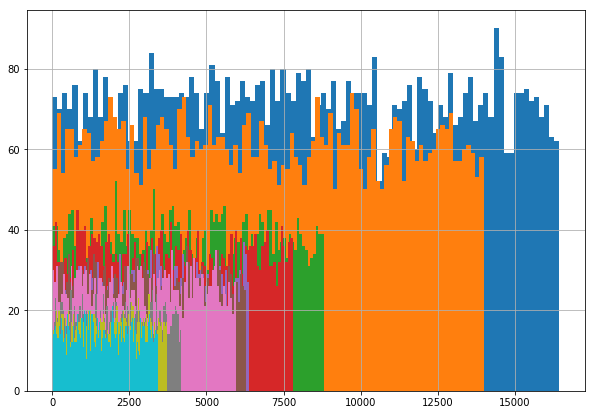

In [30]:
# посмотрим на топ 10 городов
for x in (data['City'].value_counts())[0:10].index:
    data['Ranking'][data['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

### Нормализуем переменную Ranking

In [31]:
# Создадим признак - количество ресторанов в городе city_restaurants
per_city_dict = dict(data['City'].value_counts())
data['city_restaurants'] = data.City.map(per_city_dict)

In [32]:
# Добавим признак - нормализованный ранг ranking_norm
data['ranking_norm'] = data.Ranking / data.city_restaurants

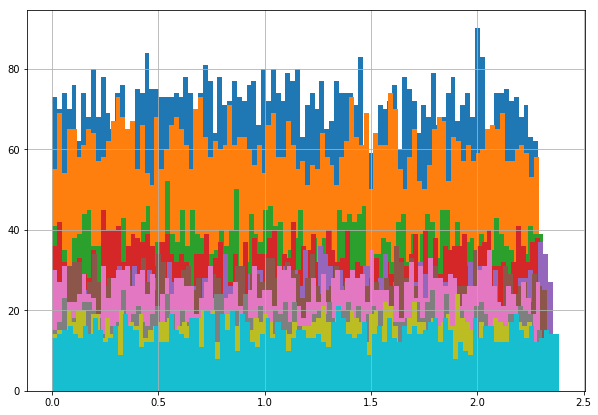

In [33]:
# Распределение после нормализации
for x in (data['City'].value_counts())[0:10].index:
    data['ranking_norm'][data['City'] == x].hist(bins=100)
plt.show()

In [34]:
# Оставим для обучения модели только нормализованны ранг
data.drop(['Ranking'], axis=1, inplace=True)

### City

In [35]:
# Создадим dummy - переменные
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

## Reviews

Создадим новый признак - количество положительных слов в отзывах review_mood

In [36]:
good = ['good', 'great', 'nice', 'best', 'excellent', 'delicious', 'friendly',
        'lovely', 'amazing', 'tasty', 'fantastic', 'perfect', 'wonderful',
        'super', 'awesome', 'love', 'beautiful', 'superb', 'interesting',
        'yummy', 'fine', 'favourite', 'surprise', 'loved', 'brilliant',
        'favorite']

data['words'] = data.Reviews.str.findall(r"(\w+)")
def mood(review):
    ''' Подсчет положительных слов в отзывах на ресторан.
    Возвращает количество положительных слов в отзывах. 
    '''
    i = 0
    for word in review:
        for mood in good:
            if mood == word.lower():
                i += 1
    return i
data['review_mood'] = data.words.dropna().apply(mood)
data.review_mood.fillna(0, inplace=True)

In [37]:
data.drop(['ID_TA'], axis=1, inplace=True)
data.drop(['URL_TA'], axis=1, inplace=True)

### Посмотрим распределение целевой переменной

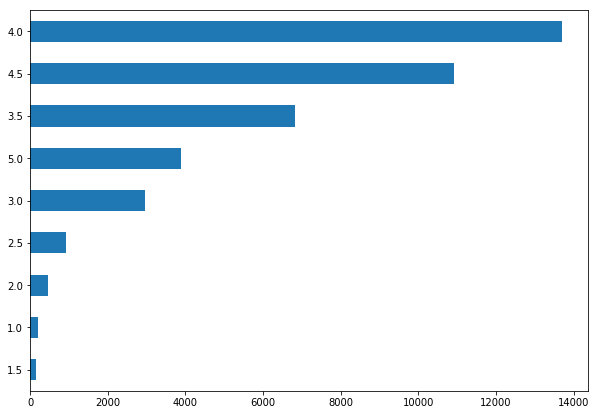

In [38]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

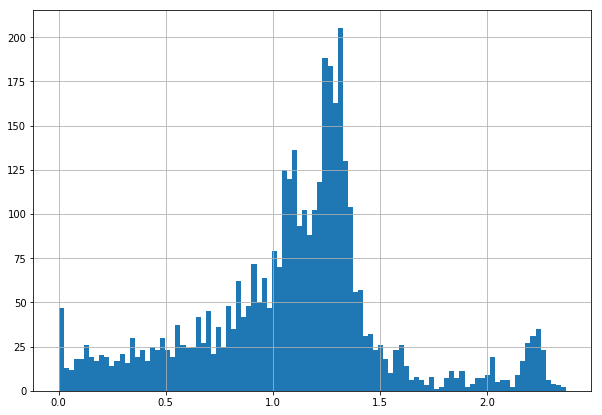

In [39]:
data['ranking_norm'][data['Rating'] == 5].hist(bins=100)

Распределение напоминает нормальное

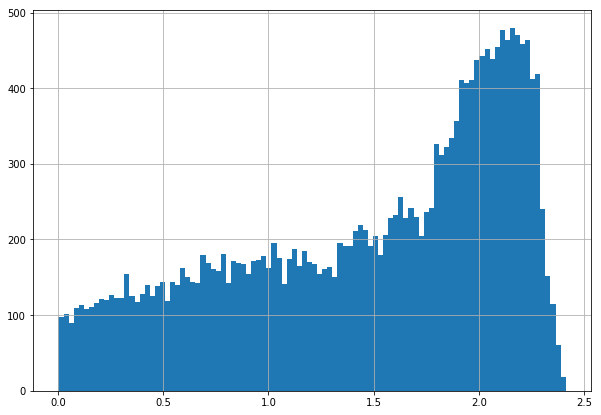

In [40]:
data['ranking_norm'][data['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

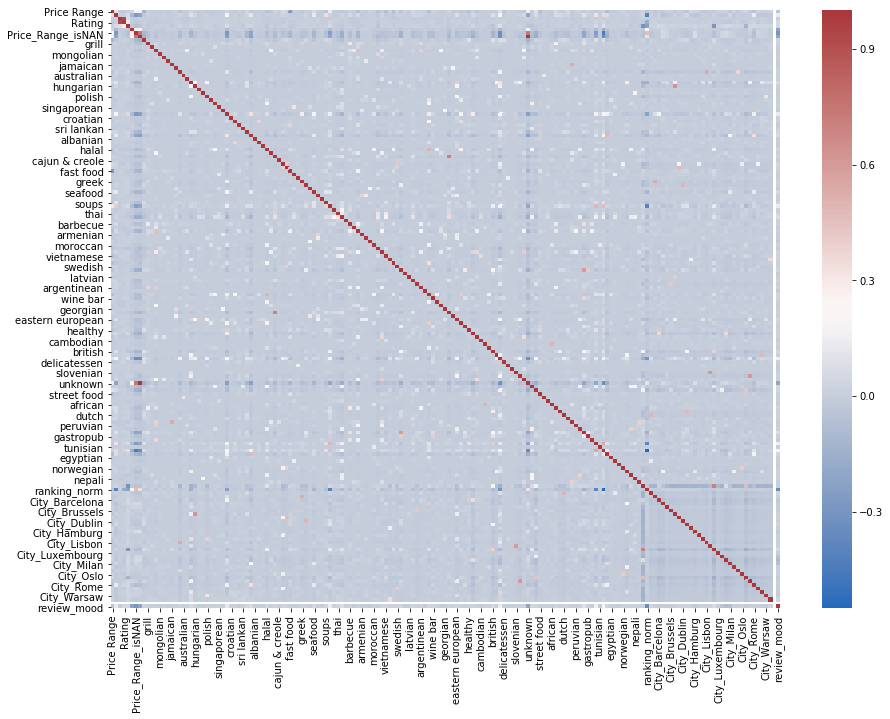

In [41]:
plt.rcParams['figure.figsize'] = (15,11)
sns.heatmap(data.corr(), cmap='vlag')

In [42]:
data.corr().Rating.sort_values(ascending=False).to_frame()

,Rating
Rating,1.000000
sample,0.936543
chain,0.150831
review_mood,0.049481
vegetarian friendly,0.037317
...,...
Price_Range_isNAN,-0.020519
chinese,-0.020975
City_Milan,-0.023233
ranking_norm,-0.168728


# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [43]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [44]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['ID_TA'], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number_of_Reviews_isNAN'] = pd.isna(df_output['Number of Reviews']).astype('uint8')
    df_output['Number of Reviews'].fillna(0, inplace=True)
    df_output['Price_Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')
    replace_price_range = {'Price Range': {"$": 1, "$$ - $$$": 2, "$$$$": 3, np.NaN: 2}}
    df_output.replace(replace_price_range, inplace=True)
    df_output['Cuisine_Style_isNAN'] = pd.isna(df_output['Cuisine Style']).astype('uint8')
    df_output['Cuisine Style'] = df_output['Cuisine Style'].fillna("['Unknown']")
    
    ### Немного Feature Engineering, потому что его надо делать раньше дамми переменных 

    per_city_dict = dict(df_output['City'].value_counts())
    df_output['city_restaurants'] = df_output.City.map(per_city_dict)

    df_output['ranking_norm'] = df_output.Ranking / df_output.city_restaurants
    
    good = ['good', 'great', 'nice', 'best', 'excellent', 'delicious', 'friendly',
        'lovely', 'amazing', 'tasty', 'fantastic', 'perfect', 'wonderful',
        'super', 'awesome', 'love', 'beautiful', 'superb', 'interesting',
        'yummy', 'fine', 'favourite', 'surprise', 'loved', 'brilliant',
        'favorite']

    df_output['words'] = df_output.Reviews.str.findall(r"(\w+)")
    def mood(review):
        ''' Подсчет положительных слов в отзывах на ресторан.
        Возвращает количество положительных слов в отзывах. 
        '''
        i = 0
        for word in review:
            for mood in good:
                if mood == word.lower():
                    i += 1
        return i
    df_output['review_mood'] = df_output.words.dropna().apply(mood)
    df_output.review_mood.fillna(0, inplace=True)
    # ################### 3. Encoding ############################################################## 
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    def cuisine (df):
        df['Cuisine Style'] = df['Cuisine Style'].str.lower()

        cuisineStyle = set()
        cuisines = df['Cuisine Style'].to_list()

        for cuisine in cuisines:
            cuisine = re.findall(r"'([\s\S]+?)'", cuisine)
            for j in cuisine:
                 cuisineStyle.add(j)
    
        for item in cuisineStyle:
            df[item] = df['Cuisine Style'].apply(lambda x: 1 if item in x else 0)
        return df
    df_output = cuisine(df_output)
    
    
    # ################### 4. Feature Engineering ####################################################
    chain_lst = list(df_output.Restaurant_id.value_counts()[df_output.Restaurant_id.value_counts() > 1].index)
    df_output['chain'] = df_output[data.Restaurant_id.isin(chain_lst)].Restaurant_id.apply(lambda x: 1)
    df_output['chain'].fillna(0, inplace=True)
    df_output['chain'] = df_output['chain'].astype(int)
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [45]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,Price_Range_isNAN,Cuisine_Style_isNAN,city_restaurants,ranking_norm,...,pizza,egyptian,indonesian,xinjiang,norwegian,german,bangladeshi,nepali,cuban,chain
30068,2443.0,2,221.0,1,4.0,0,0,0,7193,0.339636,...,0,0,0,0,0,0,0,0,0,1
1747,3095.0,2,6.0,0,0.0,0,1,1,2705,1.144177,...,0,0,0,0,0,0,0,0,0,1
29721,1724.0,2,357.0,1,3.5,0,0,0,3813,0.452137,...,0,0,0,0,0,0,0,0,0,1
46444,15009.0,2,9.0,1,3.0,0,1,1,7193,2.086612,...,0,0,0,0,0,0,0,0,0,0
2149,748.0,2,132.0,0,0.0,0,0,0,1647,0.454159,...,0,0,0,0,0,0,0,0,0,1
44702,2560.0,2,0.0,1,3.0,1,1,1,1145,2.235808,...,0,0,0,0,0,0,0,0,0,1
37084,2566.0,2,223.0,1,4.0,0,0,0,6108,0.420105,...,1,0,0,0,0,0,0,0,0,1
19088,7382.0,2,54.0,1,3.5,0,0,0,7193,1.026276,...,0,0,0,0,0,0,0,0,0,1
35907,5287.0,2,7.0,1,4.5,0,1,0,3813,1.386572,...,0,0,0,0,0,0,0,0,0,1
39889,153.0,2,809.0,1,4.0,0,0,0,1372,0.111516,...,0,0,0,0,0,0,0,0,0,1


In [46]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 170 entries, Ranking to chain
dtypes: float64(5), int64(130), uint8(35)
memory usage: 53.2 MB


In [47]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [48]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [49]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 169), (40000, 169), (40000, 168), (32000, 168), (8000, 168))

# Model 
Сам ML

In [50]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [51]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [52]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [53]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20544874999999999


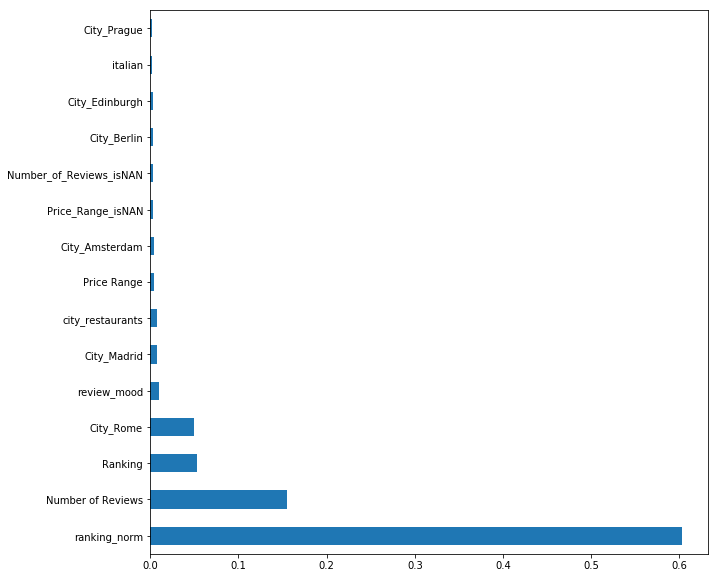

In [54]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [55]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,Number_of_Reviews_isNAN,Price_Range_isNAN,Cuisine_Style_isNAN,city_restaurants,ranking_norm,review_mood,...,pizza,egyptian,indonesian,xinjiang,norwegian,german,bangladeshi,nepali,cuban,chain
7326,409.0,2,115.0,0.0,0,0,0,488,0.838115,2.0,...,0,0,0,0,0,0,0,0,0,0
1358,319.0,2,241.0,0.0,0,0,0,1021,0.312439,2.0,...,0,0,0,0,0,0,0,0,0,1
1030,729.0,2,35.0,0.0,0,0,0,819,0.890110,1.0,...,0,0,0,0,0,0,0,0,0,1
6339,24.0,2,535.0,0.0,0,0,0,3395,0.007069,2.0,...,0,0,0,0,0,0,0,0,0,1
218,1027.0,2,485.0,0.0,0,0,0,2589,0.396678,2.0,...,0,0,0,0,0,0,0,0,0,1
2077,835.0,2,68.0,0.0,0,0,0,1126,0.741563,1.0,...,0,0,0,0,0,0,0,0,0,1
1210,11485.0,2,3.0,0.0,0,1,1,7193,1.596691,2.0,...,0,0,0,0,0,0,0,0,0,1
3628,2258.0,2,6.0,0.0,0,1,0,1126,2.005329,0.0,...,0,0,0,0,0,0,0,0,0,1
1733,7973.0,2,78.0,0.0,0,0,0,3813,2.091004,1.0,...,0,0,0,0,0,0,0,0,0,1
3775,16207.0,3,3.0,0.0,0,0,0,7193,2.253163,2.0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
test_data = test_data.drop(['Rating'], axis=1)

In [57]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [58]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [59]:
predict_submission

array([3.065, 4.235, 4.485, ..., 3.04 , 4.49 , 4.22 ])

In [60]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head()

,Restaurant_id,Rating
0,id_0,3.065
1,id_1,4.235
2,id_2,4.485
3,id_3,4.350
4,id_4,4.470


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
